## Nonlinear dimensionality reduction via Kernel PCA

Most machine learning algorithms have been developed and statistically validated for linearly separable data. Popular examples are linear classifiers like Support Vector Machines (SVMs) or the (standard) Principal Component Analysis (PCA) for dimensionality reduction. However, most real world data requires nonlinear methods in order to perform tasks that involve the analysis and discovery of patterns successfully.

### Kernel Principal Component Analysis(Kernel PCA):
Principal component analysis (PCA) is a popular tool for dimensionality reduction and feature extraction for a linearly separable dataset. But if the dataset is not linearly separable, we need to apply the Kernel PCA algorithm. It is similar to PCA except that it uses one of the kernel tricks to first map the non-linear features to a higher dimension, then it extracts the principal components as same as PCA.

The kernel function maps the original d-dimensional features into a larger, k-dimensional feature space by creating nonlinear combinations of the original features.

A **radial basis function (RBF)** is a real-valued function _φ_ whose value depends only on the distance between the input and some fixed point, either the origin, so that _φ_(x) = _φ_(‖x‖), or some other fixed point _c_, called a center, so that _φ_(_x_) = _φ_(‖x−c‖). Any function _φ_ that satisfies the property _φ_(x) = _φ_(‖x‖) is a radial function. 

Commonly used types of radial basis functions include (writing _r=‖x−x<sub>i</sub>‖_ and using _ε_ to indicate a shape parameter that can be used to scale the input of the radial kernel).

**Gaussian**:

$\ \varphi (r)=e^{-(\varepsilon r)^{2}}$

**Multiquadric**:

$ \varphi (r)={\sqrt {1+(\varepsilon r)^{2}}}$

**Inverse quadratic**:

$\varphi (r)={\dfrac {1}{1+(\varepsilon r)^{2}}}$

**Inverse multiquadric**:

$\displaystyle \varphi (r)={\dfrac {1}{\sqrt {1+(\varepsilon r)^{2}}}}$

### Implementing the RBF kernel PCA step-by-step

In order to implement the RBF kernel PCA we just need to consider the following two steps.

1.**Computation of the kernel (similarity) matrix.**

In this first step, we need to calculate

\begin{equation} \kappa(\mathbf{x_i, x_j}) = exp\bigg(- \gamma \; \lVert\mathbf{x_i - x_j }\rVert^{2} \bigg)\end{equation}

for every pair of points. E.g., if we have a dataset of 100 samples, this step would result in a symmetric 100x100 kernel matrix.

2.**Eigendecomposition of the kernel matrix.**

Since it is not guaranteed that the kernel matrix is centered, we can apply the following equation to do so:

\begin{equation} K’ = K - \mathbf{1_N} K - K \mathbf{1_N} + \mathbf{1_N} K \mathbf{1_N} \end{equation}

where **1<sub>N</sub>** is a N-by-N matrix with all values equal to 1/N.

Now, we have to obtain the eigenvectors of the centered kernel matrix that correspond to the largest eigenvalues. Those eigenvectors are the data points already projected onto the respective principal components.


### Implementing KPCA in Python

#### Half-moon shapes
We will start with a simple example of 2 half-moon shapes generated by the make_moons function from scikit-learn.

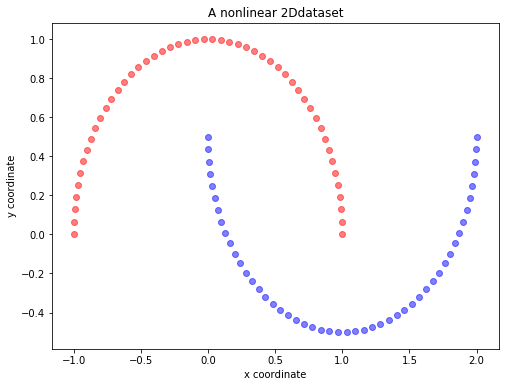

In [21]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

Since the two half-moon shapes are linearly inseparable, we expect that the “classic” PCA will fail to give us a “good” representation of the data in 1D space. Let us use PCA class to perform the dimensionality reduction.

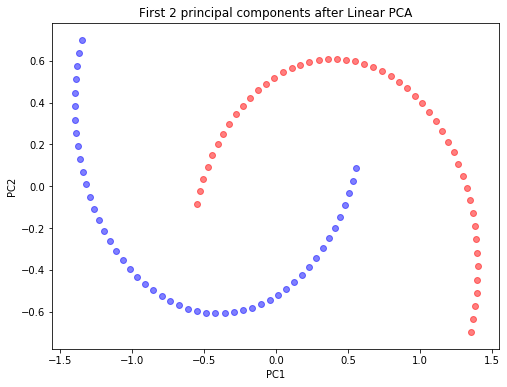

In [22]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


As we can see, the resulting principal components do not yield a subspace where the data is linearly separated well. Note that PCA is a unsupervised method and does not “consider” class labels in order to maximize the variance. Here, the colors blue and red are just added for visualization purposes to indicate the degree of separation.

Let us plot the first principal component:

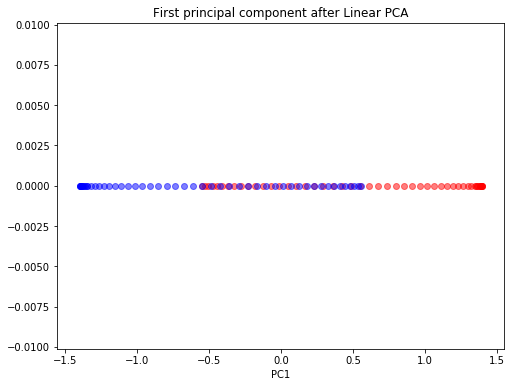

In [24]:
import numpy as np
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

As we can see, linear PCA is unable to separate the given half-moon data in 1D.

Next, we will perform dimensionality reduction via RBF kernel PCA on our half-moon data.

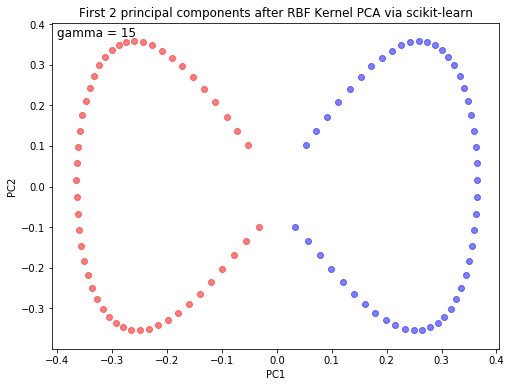

In [32]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.4, 0.37, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

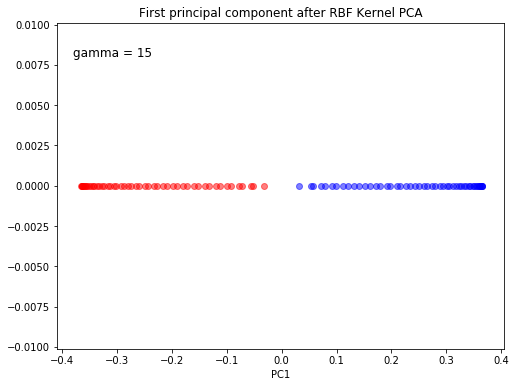

In [33]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.text(-0.38, 0.008, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

#### Concentric Circles

For our next example, we will have a look at the classic case of 2 concentric circles with random noise produced by scikit-learn’s make_circles.

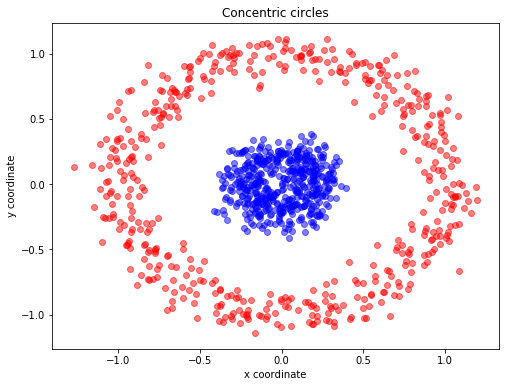

In [34]:
from sklearn.datasets import make_circles

Z, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(Z[y==0, 0], Z[y==0, 1], color='red', alpha=0.5)
plt.scatter(Z[y==1, 0], Z[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

Linear PCA

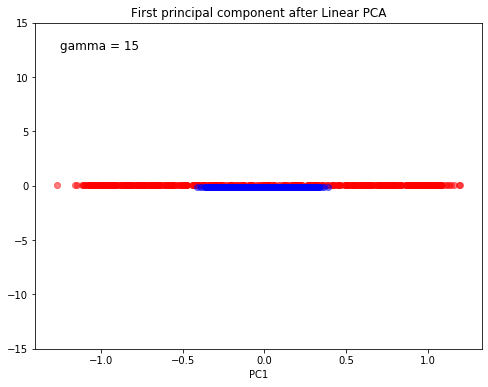

In [35]:
scikit_pca = PCA(n_components=2)
Z_spca = scikit_pca.fit_transform(Z)

plt.figure(figsize=(8,6))
plt.scatter(Z[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(Z[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.text(-1.25, 12.5, 'gamma = 15', fontsize=12)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

Again, the results obtained via the linear PCA approach does not produce a subspace where the 2 classes are linearly well separated.

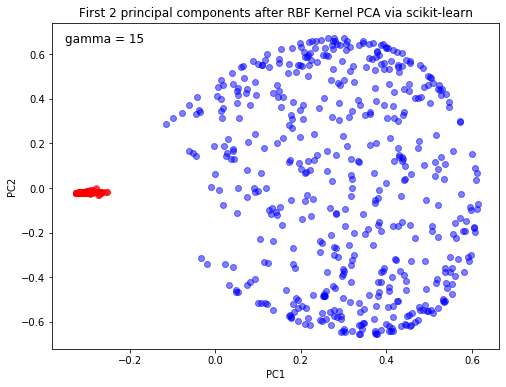

In [38]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
Z_skernpca = scikit_kpca.fit_transform(Z)

plt.figure(figsize=(8,6))
plt.scatter(Z_skernpca[y==0, 0], Z_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(Z_skernpca[y==1, 0], Z_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.35, 0.65, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

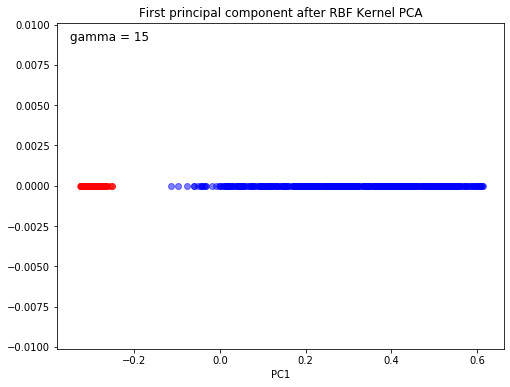

In [39]:
scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
Z_pc = scikit_kpca.fit_transform(Z)

plt.figure(figsize=(8,6))
plt.scatter(Z_pc[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(Z_pc[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-.35, 0.009, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()

And again, this 1-dimensional subspace obtained via kernel PCA looks much better in terms of linear class separation.

### Advantage & disadvantage of kernel PCA
Kernel PCA (kPCA) actually includes regular PCA as a special case- they're equivalent if the linear kernel is used. But, they have different properties in general. Here are some points of comparison:

•**_Linear vs. nonlinear structure_**. kPCA can capture nonlinear structure in the data (if using a nonlinear kernel), whereas PCA cannot. This can be a big deal; if this capability is needed, PCA simply isn't an option and kPCA (or one of many other nonlinear dimensionality reduction techniques) must be used. If the data truly live on a linear manifold, kPCA can do no better than PCA. In fact, using a nonlinear kernel may give worse performance due to overfitting.


•**_Interpretability_**. PCA provides a set of weights that define a linear mapping from the input space to the low-dimensional embedding space. These weights can provide useful information about the structure of the data. No such weights exist for kPCA with nonlinear kernels because the mapping is nonlinear. It's also nonparametric.


•**_Inverse mapping_**. PCA provides an inverse mapping from the low-dimensional space back to the input space. So, input points can be approximately reconstructed from their low-dimensional images. kPCA doesn't inherently provide an inverse mapping, although it's possible to estimate one using additional methods (at the cost of extra complexity and computational resources).


•**_Hyperparameters_**. Both methods require choosing the number of dimensions. kPCA also requires choosing the kernel function and any associated parameters (e.g. the bandwidth of an RBF kernel, or degree of a polynomial kernel). This choice (and the method/criterion employed to make it) is problem dependent. Typically, one needs to re-fit kPCA multiple times to compare different kernel/parameter choices.


•**_Computational cost_**. PCA generally has lower memory and runtime requirements than kPCA, and can be scaled to massive datasets. Various strategies exist for scaling up kPCA, but this requires making approximations (e.g. see the Nystroem approximation).

### Questionnaire

##### What makes the Gaussian kernel so magical for PCA?

[Solution](https://github.com/ebi-byte/kt/blob/master/Kernel%20PCA/Nonlinear%20Dimensionality%20Reduction%20Questionnaire.ipynb)